# Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import sklearn
from sklearn import cluster

from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

df = pd.read_csv("Amazon Items Cleaned.csv")
df

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,"NOCO NUSB211NA 10W USB Power Adapter, 2.1A 5V ...",NOCO,3869.0,0,0,28.0,13.95,4.7
1,Amazfit Band 5 Activity Fitness Tracker with A...,Amazfit,21158.0,0,0,1000.0,29.88,4.1
2,Amazon Basics Universal Travel Case Organizer ...,AmazonBasics,16242.0,0,1,277.0,14.44,4.6
3,"Amazon Glow with Tangram Bits | Learn, Play, R...",Amazon,215.0,0,1,31.0,329.98,4.4
4,"Echo Show 5 (2nd Gen, 2021 release) - Deep Sea...",Amazon,928.0,0,1,21.0,114.98,4.7
...,...,...,...,...,...,...,...,...
1631,American Eagle Gift Card,American Eagle,5999.0,0,0,4.0,25.00,4.9
1632,Amazon.com Gift Cards - As a Bookmark,Amazon,3950.0,0,0,15.0,100.00,4.9
1633,Amazon.com Gift Card in a Gift Tag,Amazon,7520.0,0,0,12.0,10.00,4.9
1634,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014.0,0,0,3.0,30.00,4.9


Transfering DataFrame to numeric values

In [2]:
def transfer_str_to_numeric_vals(dataset,str_col,id_col_to_remove):
    DF = dataset.copy()
    for column in DF :
        DF[str_col] = pd.factorize(DF[str_col])[0] + 1
    DF.pop(id_col_to_remove)
    return DF

num_dataset = transfer_str_to_numeric_vals(df, 'Name', 'Brand')
num_dataset

,Name,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,1,3869.0,0,0,28.0,13.95,4.7
1,2,21158.0,0,0,1000.0,29.88,4.1
2,3,16242.0,0,1,277.0,14.44,4.6
3,4,215.0,0,1,31.0,329.98,4.4
4,5,928.0,0,1,21.0,114.98,4.7
...,...,...,...,...,...,...,...
1631,660,5999.0,0,0,4.0,25.00,4.9
1632,1439,3950.0,0,0,15.0,100.00,4.9
1633,1440,7520.0,0,0,12.0,10.00,4.9
1634,1441,3014.0,0,0,3.0,30.00,4.9


Scaling DataSet

In [3]:
def scale_dataset(dataset):
    scaler = StandardScaler()
    
    DFScaled = scaler.fit_transform(dataset)
    
    return DFScaled

dfScaled = scale_dataset(num_dataset)
dfScaled

array([[-1.59221768, -0.12708992, -0.17009062, ..., -0.27852636,
        -0.33342472,  0.74935901],
       [-1.5898465 ,  0.53877864, -0.17009062, ...,  5.62962395,
        -0.2580302 , -1.19299854],
       [-1.58747532,  0.34944381, -0.17009062, ...,  1.23498128,
        -0.33110562,  0.42563275],
       ...,
       [ 1.81990883,  0.0135247 , -0.17009062, ..., -0.37577987,
        -0.35211953,  1.39681153],
       [ 1.82228001, -0.16001939, -0.17009062, ..., -0.43048496,
        -0.25746226,  1.39681153],
       [ 1.82465119,  0.40582831, -0.17009062, ..., -0.24813464,
        -0.26692798,  0.42563275]])

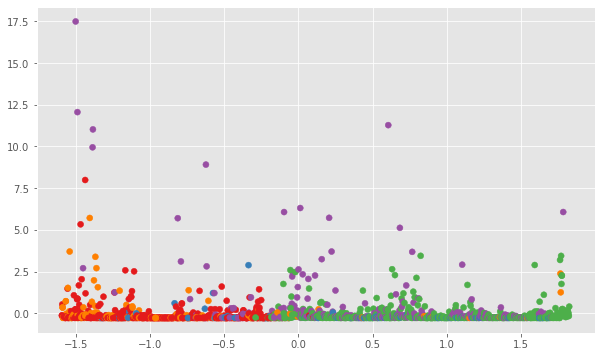

In [4]:
model = KMeans(n_clusters=5, n_init=1, init='random', max_iter=1)
y_pred = model.fit_predict(dfScaled)
plt.scatter(dfScaled[:, 0], dfScaled[:, 1], c=y_pred,  marker="o", cmap=cmap);

K-means

In [5]:
def perform_k_means(dataset, num_clusters, init_val, n_init_val, rand_state):
    model = KMeans(n_clusters = num_clusters, n_init = n_init_val, init = init_val, random_state = rand_state)
    predicted_vals = model.fit_predict(dataset)
        
    return model, predicted_vals

Find best initialization parameters for K-means

In [6]:
def get_best_init_params_for_k_means(dataset, num_clusters, init_options, n_init_options, rand_state):
    
    score_list = list()
            
    for i in n_init_options :
        for j in init_options :
            Kresult = perform_k_means(dataset, num_clusters, j, i,rand_state)
            score_list.append(Kresult[0].inertia_)
        print(Kresult)
    
    best_score = score_list[0]
    
    for i in range(0,len(score_list),1) :
        if score_list[i] < best_score :
            best_score = score_list[i]
            best_init_val = Kresult[0].init
            best_n_init_val = Kresult[0].n_init            
    
    return best_score, best_init_val, best_n_init_val

num_clusters = 3
init_options = ['random', 'k-means++']
n_init_options = [1,5,10]
rand_state = 42

best_score, best_init_val, best_n_init_val = get_best_init_params_for_k_means(dfScaled, num_clusters, init_options, n_init_options, rand_state)    
print(best_score)
print(best_init_val)
print(best_n_init_val)

(KMeans(n_clusters=3, n_init=1, random_state=42), array([0, 0, 1, ..., 0, 0, 0]))
(KMeans(n_clusters=3, n_init=5, random_state=42), array([0, 0, 1, ..., 0, 0, 0]))
(KMeans(n_clusters=3, random_state=42), array([0, 0, 1, ..., 0, 0, 0]))
8015.931546209357
k-means++
10


In [7]:
def compare_number_of_clusters(dataset, num_cluster_options, init_val, n_init_val, rand_state):

    lst_scores = list()
            
    for i in num_cluster_options :
        Kresult = perform_k_means(dataset, i, init_val, n_init_val, rand_state)
        lst_scores.append(Kresult[0].inertia_)
            
    return lst_scores

num_clusters_options = [1,2,3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 10
rand_state = 42

scores = compare_number_of_clusters(dfScaled, num_clusters_options, init_val, n_init_val, rand_state)
scores

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[11452.0,
 9663.940596011536,
 8015.931546209357,
 6843.999726735043,
 5608.589002664361,
 4886.98633570482,
 4037.563070597593,
 3434.466154971799,
 3142.615343260596]

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


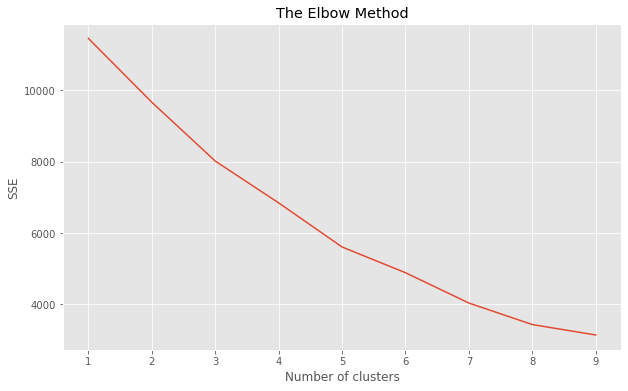

In [8]:
scores_2_3 = compare_number_of_clusters(dfScaled, num_clusters_options, init_val, n_init_val, rand_state)

plt.plot(num_clusters_options,scores_2_3)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

With the elbow method we can see that the best number of clusters is 8

Evaluation of K-means with silhouette score

In [9]:
def get_best_num_of_clusters_for_k_means(dataset, num_cluster_options, init_val, n_init_val, rand_state):
    
    lst_scores = list()
    silhouette_lst = list()
    Klist = list()
            
    for i in num_cluster_options :
        Kresult = perform_k_means(dataset, i, init_val, n_init_val, rand_state)
        Klist.append(Kresult[0].n_clusters)
        lst_scores.append(Kresult[1])
        
    best_score = silhouette_score(dataset, lst_scores[0])
        
    for i in range(0,len(lst_scores),1) :
        if silhouette_score(dataset, lst_scores[i]) > best_score :
            best_score = silhouette_score(dataset, lst_scores[i])
            num_clusters = Klist[i]
        
    return best_score, num_clusters

num_clusters_options = [2,3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 1
rand_state = 42

best_score, best_num_clusters = get_best_num_of_clusters_for_k_means(dfScaled, num_clusters_options, init_val, n_init_val, rand_state)
print("Best number of clusters is : " + str(best_num_clusters))
print("The best score is : " + str(best_score))


Best number of clusters is : 8
The best score is : 0.34672514888171496


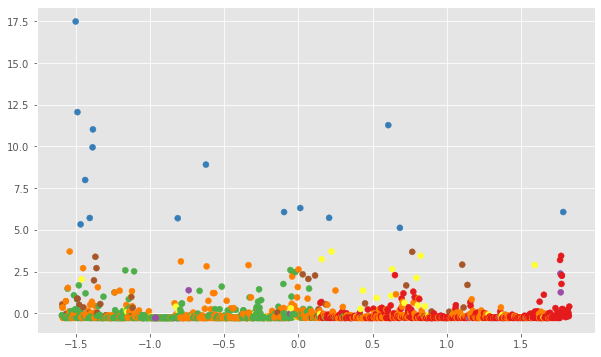

In [10]:
km = KMeans(n_clusters=8, n_init=10, init='random', max_iter=10)
y_pred = km.fit_predict(dfScaled)
plt.scatter(dfScaled[:, 0], dfScaled[:, 1], c=y_pred,  marker="o", cmap=cmap);

Hierarchical clustering

In [11]:
def perform_hierarchical_clustering(dataset, num_clusters, linkage_val):
    
    agg_cluster_model = AgglomerativeClustering(n_clusters = num_clusters, linkage = linkage_val)
    y_pred = agg_cluster_model.fit_predict(dataset)
    
    return agg_cluster_model, y_pred

linkage_val = 'single'
hierarchical_model, predicted_vals = perform_hierarchical_clustering(dfScaled, num_clusters, linkage_val)
print(hierarchical_model)
print(predicted_vals)

AgglomerativeClustering(linkage='single', n_clusters=3)
[0 0 0 ... 0 0 0]


Find best 'linkage' method for hierarchical agglomerative clustering

In [12]:
def get_best_linkage_method(dataset, num_clusters, linkage_options):
    
    Kresult = list()
    Klist = list()
    lst_scores = list()
    
    for i in linkage_options :
        Kresult = perform_hierarchical_clustering(dataset, num_clusters, i)
        lst_scores.append(Kresult[1])
        Klist.append(Kresult[0].linkage)
                        
    best_score = silhouette_score(dataset, lst_scores[0])
        
    for i in range(0,len(lst_scores),1) :
        if silhouette_score(dataset, lst_scores[i]) > best_score :
            best_score = silhouette_score(dataset, lst_scores[i])
            best_linkage = Klist[i]
        
    return best_score, best_linkage

num_clusters = 8
linkage_options = ['single', 'complete', 'average', 'ward']
rand_state = 42

best_score, best_linkage_method = get_best_linkage_method(dfScaled, num_clusters, linkage_options)
print(best_score)
print(best_linkage_method)

0.5800603058478546
average


DBSCAN

In [13]:
def perform_density_based_clustering(dataset, epsilon_val, minimum_samples_val):
    model = DBSCAN(eps = epsilon_val, min_samples = minimum_samples_val)
    predicted_vals = model.fit_predict(dataset)
    
    return model, predicted_vals

epsilon_val = 10
minimum_samples_val = 5
density_based_model, predicted_vals = perform_density_based_clustering(num_dataset, epsilon_val, minimum_samples_val)
print(density_based_model)
print(predicted_vals)

DBSCAN(eps=10)
[-1 -1 -1 ... -1 -1 -1]
